In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

In [10]:
target_file_dir = "../datas/"
target_file_name = "real_estate_data_20211_20224_14_extract_by_cate"
target_file_end = ".csv"
df = pd.read_csv(target_file_dir + target_file_name + target_file_end)
df['TradePrice'] = df.TradePrice/10000

,Type,Prefecture,Municipality,DistrictName,Structure,FloorPlan,TradePrice,AgeAtTrade,Area,TotalFloorArea,CoverageRatio,FloorAreaRatio,BuildingYearW,TradeYear,TradeQuarter
0,宅地(土地と建物),神奈川県,横浜市鶴見区,朝日町,木造,NaN,4000.0,5.0,60,95.0,60.0,200.0,2017.0,2022,2
1,中古マンション等,神奈川県,横浜市鶴見区,朝日町,ＲＣ,３ＬＤＫ,2200.0,38.0,70,NaN,60.0,200.0,1983.0,2021,4
2,中古マンション等,神奈川県,横浜市鶴見区,朝日町,ＲＣ,３ＬＤＫ,2100.0,38.0,70,NaN,60.0,200.0,1983.0,2021,4
3,中古マンション等,神奈川県,横浜市鶴見区,朝日町,ＲＣ,３ＬＤＫ,1300.0,38.0,70,NaN,60.0,200.0,1983.0,2021,2
4,中古マンション等,神奈川県,横浜市鶴見区,朝日町,ＲＣ,３ＬＤＫ,2300.0,38.0,70,NaN,60.0,200.0,1983.0,2021,2


In [11]:
def plot_hist_of_bar(df_, target_col, bins_, add_class_col_to_df = True, save_fig=False):
    # 指定列に対して、指定したbins(左端指定)でのhistgramを作成
    bins_ = bins_ + [999999]

    df_['Classified'] = pd.cut(df_[target_col], bins=bins_, labels=[str(bins_[i])+'~' for i in range(len(bins_)-1)])
    if add_class_col_to_df:
        df_['Classified_'+target_col] = pd.cut(df_[target_col], bins=bins_, labels=bins_[:-1])
    df_['Classified'] = df_['Classified'].cat.add_categories('Empty').fillna('Empty')

    # 新たに作成した列の値をカウントして棒グラフを作成
    counts = df_['Classified'].value_counts().sort_index()

    # 棒グラフをプロット
    plt.figure(figsize=(10, 4))
    plt.bar(counts.index, counts, 
            color='skyblue', edgecolor='black')

    plt.xlabel('Bins')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {target_col}')
    
    if save_fig == True:
        yyyymmdd = dt.datetime.today().strftime('%Y%m%d')
        plt.savefig(f'../images/histgram_{target_col}_{yyyymmdd}.png', bbox_inches='tight')  # 保存するファイル名と拡張子を指定

    plt.show()


- TradePrice
- Area
- TotalFloorArea
- Breadth
- CoverageRatio
- FloorAreaRatio
- AgeAtTrade

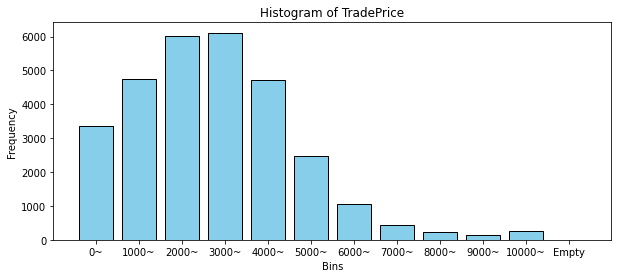

In [117]:
bins = [i*1000 for i in range(11)]
plot_hist_of_bar(df, 'TradePrice', bins, True, True)

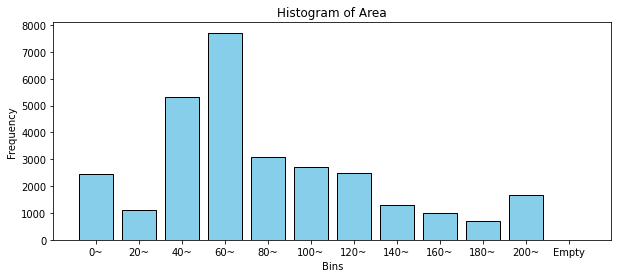

In [118]:
bins = [0,20,40,60,80,100,120,140,160,180,200]
plot_hist_of_bar(df, 'Area', bins, True, True)

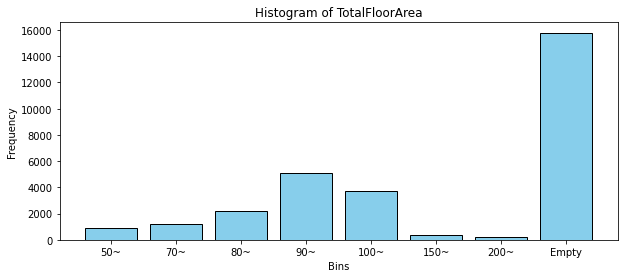

In [119]:
bins = [50,70,80,90,100,150,200]
plot_hist_of_bar(df, 'TotalFloorArea', bins, True, True)

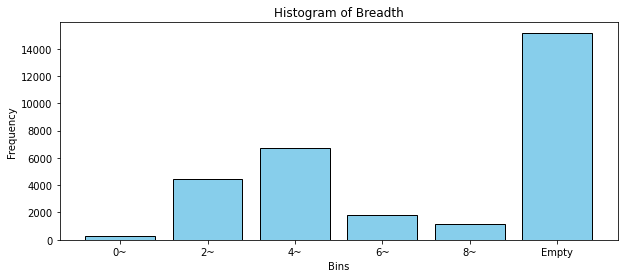

In [120]:
bins = [i*2 for i in range(5)]
# print(df.Breadth.unique())
plot_hist_of_bar(df, 'Breadth', bins, True, True)

[60. 80. 50. nan 40. 30.]


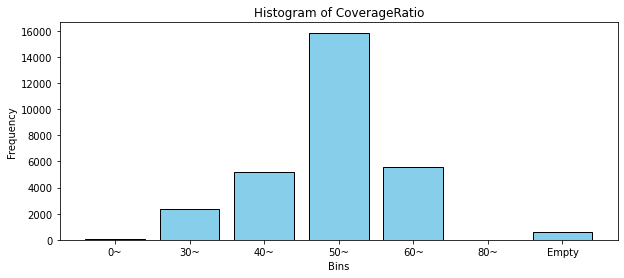

In [121]:
bins = [i for i in [0,30,40,50,60,80]]
print(df.CoverageRatio.unique())
plot_hist_of_bar(df, 'CoverageRatio', bins, True, True)

[200. 300. 400.  nan  80. 100. 150. 600. 500. 800. 700.  60.  50.]


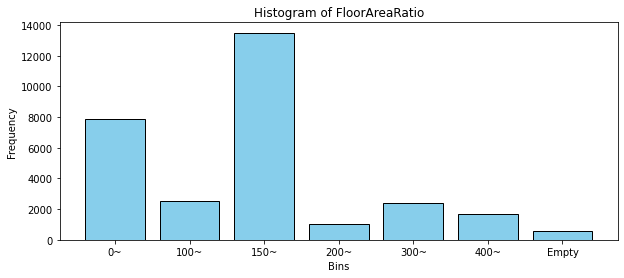

In [122]:
bins = [i*10 for i in [0,10,15,20,30,40]]
print(df.FloorAreaRatio.unique())
plot_hist_of_bar(df, 'FloorAreaRatio', bins, True, True)

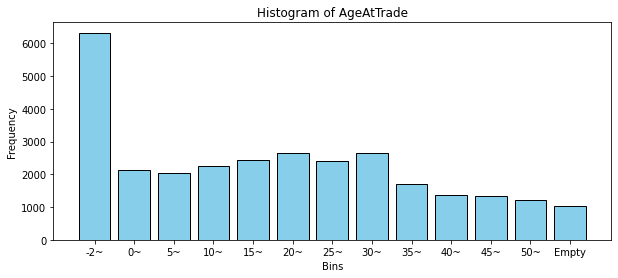

In [123]:
bins = [-2]+[i*5 for i in range(11)]
plot_hist_of_bar(df, 'AgeAtTrade', bins, True, True)

In [87]:
df.Classified_Breadth.isna().sum()

15169

In [2]:
addClassOfNonCategoryDataDic ={
    'TradePrice':[i*1000 for i in range(11)],
    'Area': [0,20,40,60,80,100,120,140,160,180,200],
    'TotalFloorArea':[50,70,80,90,100,150,200],
    'Breadth': [i*2 for i in range(5)],
    'CoverageRatio':[i for i in [0,30,40,50,60,80]],
    'FloorAreaRatio': [i*10 for i in [0,10,15,20,30,40]],
    'AgeAtTrade':  [-2]+[i*5 for i in range(11)]
}
for key, values in addClassOfNonCategoryDataDic.items():
    print(key, values)


TradePrice [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
Area [0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200]
TotalFloorArea [50, 70, 80, 90, 100, 150, 200]
Breadth [0, 2, 4, 6, 8]
CoverageRatio [0, 30, 40, 50, 60, 80]
FloorAreaRatio [0, 100, 150, 200, 300, 400]
AgeAtTrade [-2, 0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]


In [6]:
df.columns

Index(['Type', 'Region', 'MunicipalityCode', 'Prefecture', 'Municipality',
       'DistrictName', 'TradePrice', 'Area', 'UnitPrice', 'LandShape',
       'Frontage', 'Purpose', 'Breadth', 'CityPlanning', 'CoverageRatio',
       'FloorAreaRatio', 'Period', 'TotalFloorArea', 'BuildingYear',
       'Structure', 'FloorPlan', 'Renovation', 'Use', 'Remarks',
       'Frontage_over_flag', 'Area_over_flag', 'TotalFloorArea_over_flag',
       'TotalFloorArea_under_flag', 'BuildingYearW', 'TradeYear',
       'TradeQuarter', 'AgeAtTrade'],
      dtype='object')

In [8]:
df.loc[:,['BuildingYear', 'BuildingYearW']]

,BuildingYear,BuildingYearW
0,平成29年,2017.0
1,昭和58年,1983.0
2,昭和58年,1983.0
3,昭和58年,1983.0
4,昭和58年,1983.0
...,...,...
29543,昭和44年,1969.0
29544,昭和63年,1988.0
29545,平成15年,2003.0
29546,平成2年,1990.0
